### 掛接 google drive雲端硬碟
### 引入函式庫

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 安裝必要套件
! sudo apt-get -y update
! sudo apt-get -y install libboost-all-dev libhdf5-serial-dev libzmq3-dev libopencv-dev python-opencv git vim
! sudo pip install Cython scikit-image keras==2.1.1 configobj IPython
! sudo apt-get -y install python-tk python3-pip python3-dev python3-tk cuda-toolkit-9-0
! sudo pip3 install tensorflow-gpu==1.12.0
! sudo pip3 install keras==2.1.1 Cython scikit-image pandas zmq h5py opencv-python IPython configobj cupy-cuda90

# !pip install flask-ngrok
# !pip install line-bot-sdk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Get:12 http://security.ubuntu.com/ubu

In [ ]:
import os
import sys
import cv2
import glob
import json
import datetime
import PIL
import PIL.Image
import numpy as np
import pandas as pd
from google.colab import files
from google.colab.patches import cv2_imshow
from sklearn.externals import joblib
from scipy.special import boxcox1p, inv_boxcox1p

import random
import configparser
from pathlib import Path
from __future__ import unicode_literals
# from flask_ngrok import run_with_ngrok
# from flask import Flask, request, abort

In [ ]:
# 自訂圖片縮放大小功能
def img_resize(image):
    height, width = image.shape[0], image.shape[1]
    # 設置新的圖片分辨率框架
    width_limit = 1000
    height_limit = 720
    # 判斷圖片的長寬比率
    if width / height >= width_limit / height_limit:
        img_new = cv2.resize(image, (width_limit, int(height * width_limit / width)))
    else:
        img_new = cv2.resize(image, (int(width * height_limit / height), height_limit))
    return img_new

# 一、上傳圖片、輸入基本資料

In [ ]:
# 輸入基本資料
height =  179#@param {type:"number"}
weight =  98.7#@param {type:"number"}
age =  23#@param {type:"integer"}
gender = "m" #@param ["m", "f"]

In [ ]:
# 上傳圖檔
uploaded = files.upload()

Saving 8692.jpg to 8692.jpg


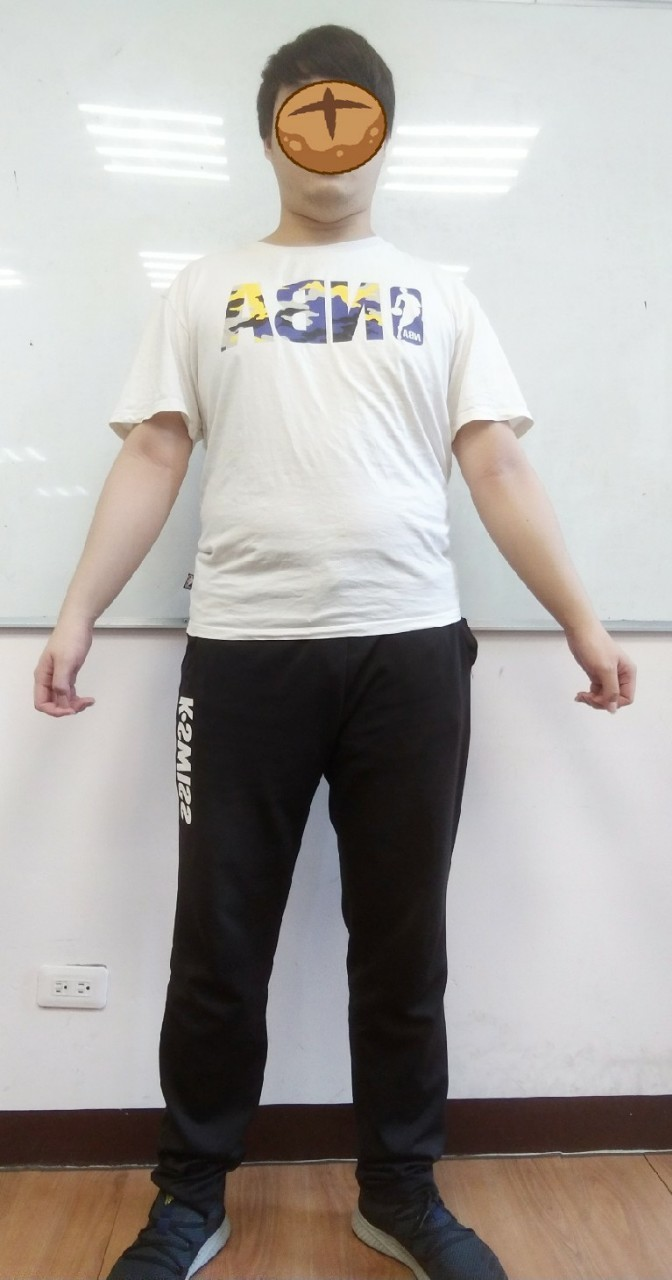

In [ ]:
# 取得上傳圖片檔名，修改到適當大小後，覆寫原本圖片
if uploaded.keys():
    filename = list(uploaded.keys())[0]
else:
    filename = glob.glob("/content/*.jpg")[0]
img = cv2.imread(filename)
# img = img_resize(img)
cv2.imwrite(filename, img)
cv2_imshow(img)

# 二、 取得人體關節、區塊


In [ ]:
# 移動目前讀取的資料夾目錄到 human-part-segmentation 資料夾
% cd "/content/drive/Shareddrives/AI_Python/ishape/ai/demo/CDCL-human-part-segmentation"
# 建立已處理資料夾 processed
dirname = "/content/processed/"
if not os.path.exists(dirname):
    os.makedirs(dirname)

/content/drive/Shareddrives/AI_Python/ishape/ai/demo/CDCL-human-part-segmentation


2021-05-26 08:46:20.068221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
start processing...
2021-05-26 08:46:22.376893: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-26 08:46:22.389579: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-26 08:46:22.389647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1e8e5fba5059): /proc/driver/nvidia/version does not exist
/content//8692.jpg
	[Original] Actual size fed into NN:  (1, 640, 336, 3)
2021-05-26 08:46:41.730813: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-05-26 08:46:41.735312: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequen

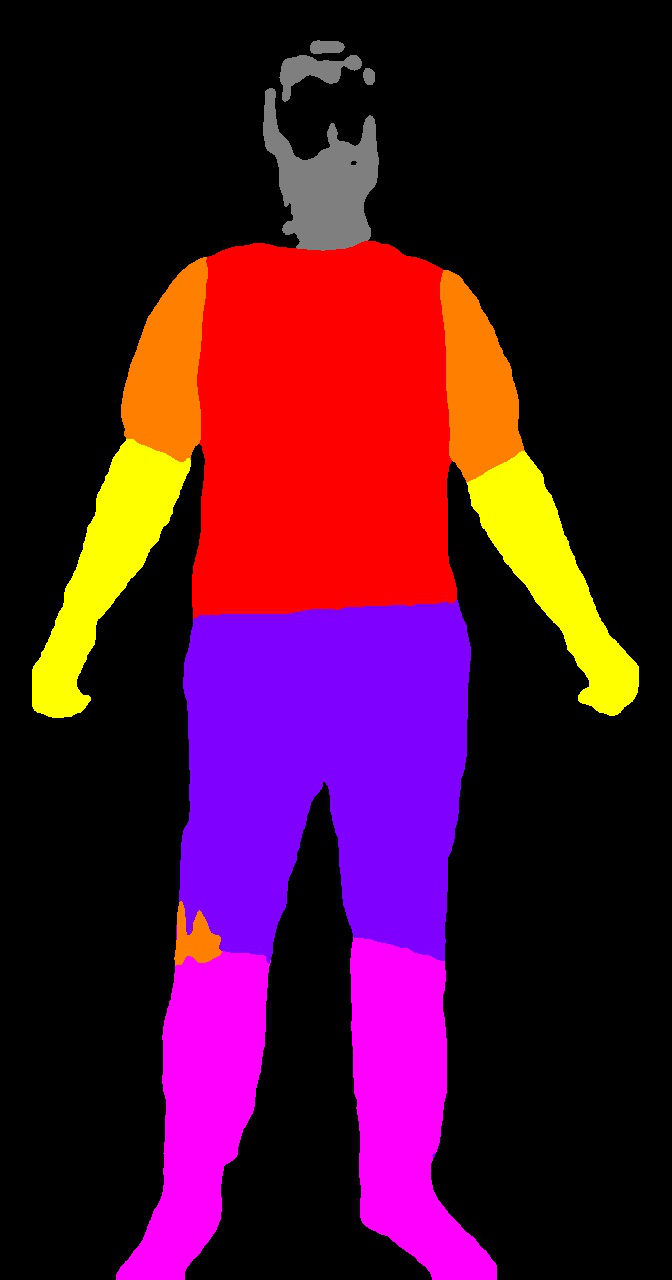

In [ ]:
# 從上傳的正面全身照圖片，劃分人體主要部分，產生人體部位圖
! python inference_7parts.py --input_folder='/content/' --output_folder='/content/processed/'
segment_img = glob.glob('/content/processed/seg_*.jpg')
PIL.Image.open(str(segment_img[0]))

2021-05-26 09:24:19.536323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
start processing...
2021-05-26 09:24:22.144774: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-26 09:24:22.164010: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-26 09:24:22.164078: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1e8e5fba5059): /proc/driver/nvidia/version does not exist
/content//8692.jpg
	Actual size fed into NN:  (1, 184, 98, 3)
2021-05-26 09:24:44.109727: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-05-26 09:24:44.110280: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 22999950

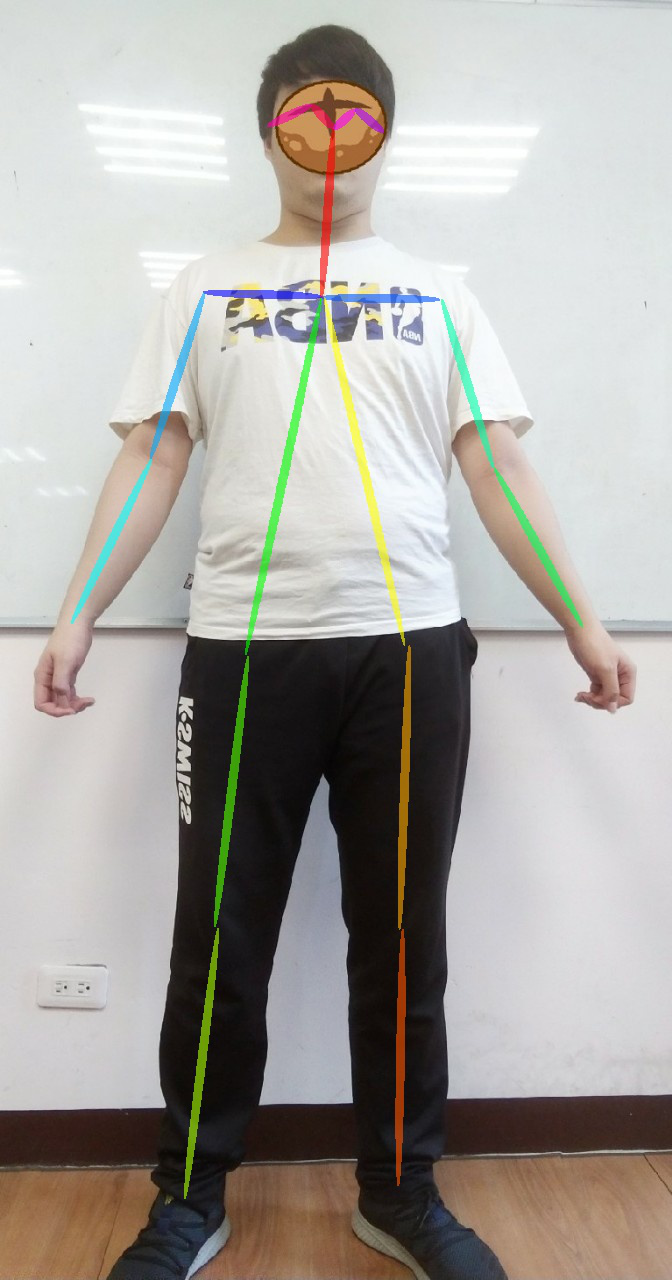

In [ ]:
# 從上傳的正面全身照圖片，取得人體骨架，產生骨架圖
!python inference_15parts_skeletons_json.py --input_folder='/content/' --output_folder='/content/processed'
sk_img = glob.glob('/content/processed/sk_*.jpg')
PIL.Image.open(str(sk_img[0]))

# 三、計算胸寬、腰寬、臀寬


In [ ]:
sys.path.append("/content/drive/Shareddrives/AI_Python/ishape/ai/demo/")
from body_width import BodyWidth

In [ ]:
# 原始圖片、人體區塊圖、人體骨架座標點
org_img = img
seg_img = cv2.imread(str(segment_img[0]))
img_json = glob.glob('/content/processed/*.json')[0]
jf = {}
with open(img_json, "r", encoding="utf-8") as f:
    jf = json.load(f)

胸寬: 36.932 公分
腰寬: 36.932 公分
臀寬: 42.336 公分


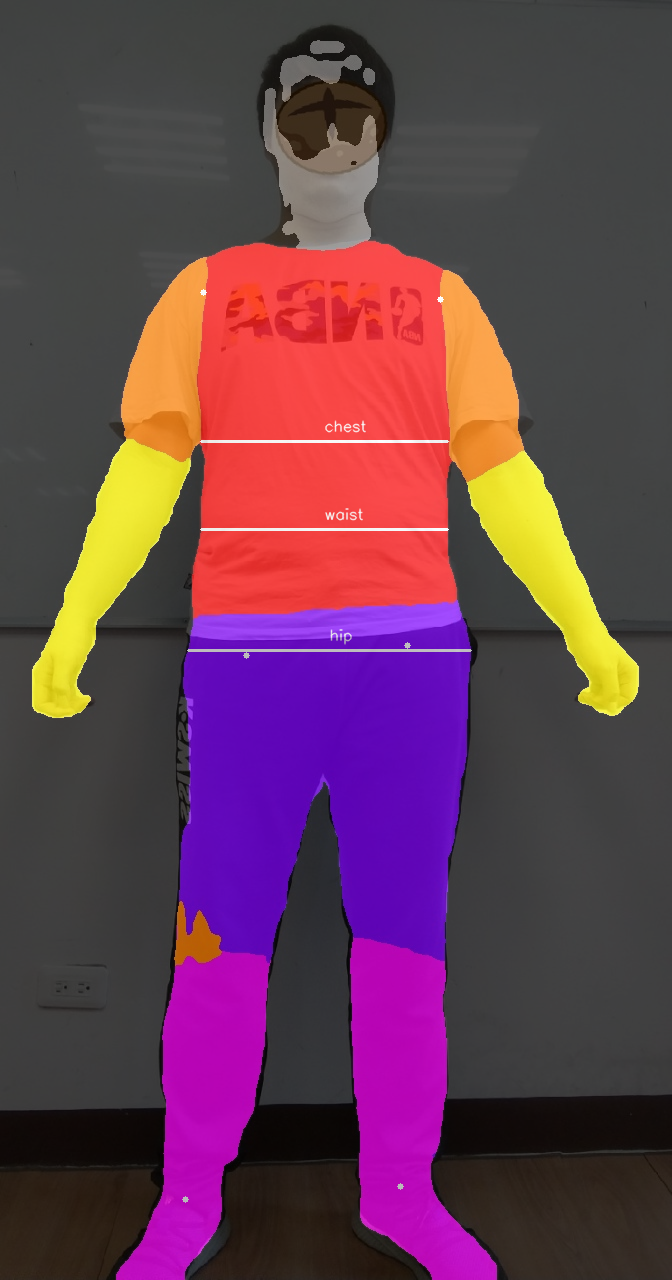

In [ ]:
bw = BodyWidth(org_img, seg_img, jf, height, gender)

# 依比例計算寬度
body_width_df = {
    "org_img": [],
    "gender":[],
    "age":[],
    "height": [],
    "weight": [],
    "width_per_px": [],
    "waist_width_px": [],
    "hip_width_px": [],
    "chest_width_px":[],
    "waist_width_cm": [],
    "hip_width_cm": [],
    "chest_width_cm":[]
}

ankle_y = bw.get_ankle_y()
shoulder_y = bw.get_shoulder_y()
waist_y = bw.get_waist_y(shoulder_y, ankle_y)
hip_y = bw.get_hip_y()

# 腰寬、臀寬
wpos1, wpos2, ww_px = bw.cal_width(waist_y)
hpos1, hpos2, hw_px = bw.cal_width(hip_y)

# 胸寬
chw_list = []
r = int((waist_y - shoulder_y) * 0.15)
for i in range(shoulder_y + r, waist_y - 2*r):
  p1, p2, w = bw.cal_width(i)
  chw_list.append((w, p1, p2))
chw = max(chw_list)
chw_px, chpos1, chpos2 = chw

cm_per_px = bw.cal_cm_per_px(shoulder_y, ankle_y, bw.sh_prop, bw.ak_prop)
chw_cm = round(chw_px * cm_per_px, 3)
ww_cm = round(ww_px * cm_per_px, 3)
hw_cm = round(hw_px * cm_per_px, 3)

print("胸寬:", chw_cm, "公分")
print("腰寬:", ww_cm, "公分")
print("臀寬:", hw_cm, "公分")

# 寫入
output_name = "bw_"+jf["name"]
body_width_df["org_img"].append(jf["name"])
body_width_df["gender"].append(gender)
body_width_df["age"].append(age)
body_width_df["height"].append(height)
body_width_df["weight"].append(weight)
body_width_df["width_per_px"].append(cm_per_px)
body_width_df["waist_width_px"].append(ww_px)
body_width_df["hip_width_px"].append(hw_px)
body_width_df["chest_width_px"].append(chw_px)
body_width_df["waist_width_cm"].append(ww_cm)
body_width_df["hip_width_cm"].append(hw_cm)
body_width_df["chest_width_cm"].append(chw_cm)
table = pd.DataFrame(body_width_df)
table.to_csv("/content/processed/body_width.csv", index=False, encoding='utf_8_sig')
# 製圖
ls_data = {
    "waist": (wpos1, wpos2),
    "hip" : (hpos1, hpos2),
    "chest": (chpos1, chpos2)
    }
# print("waist position - left & right :", ls_data["waist"])
canvas = bw.draw_width_img(ls_data)
cv2.imwrite("/content/processed/body_width.jpg",canvas)
cv2_imshow(canvas)

# 四、預測胸圍、腰圍、臀圍

### 預測胸圍
使用演算法；隨機森林 Random Forest Regressor 

In [ ]:
bmi =  round(weight / ((height / 100) ** 2), 3)
user_info = {
    'age': age,
    'height': height,
    'weight': weight,
    'chest_width_cm': chw_cm,
    'waist_width_cm': ww_cm,
    'hip_width_cm': hw_cm,
    'bmi': bmi
}
user_df = pd.DataFrame.from_dict(user_info,orient='index').T
user_df

,age,height,weight,chest_width_cm,waist_width_cm,hip_width_cm,bmi
0,23.0,179.0,98.7,36.932,36.932,42.336,30.804


In [ ]:
# transpose user_info's keys to predict_df's columns
predict_df = pd.DataFrame.from_dict(user_info,orient='index').T
pd.set_option("display.max_columns", None)

model_chest = joblib.load('/content/drive/Shareddrives/AI_Python/ishape/ai/step2/chest/RandomForestRegressor/RandomForestRegressor_pre_chest_2021-05-20_12:43:07.h5')
user_df['chest'] = model_chest.predict(predict_df)

### 預測腰圍
使用演算法；隨機森林 Random Forest Regressor 

In [ ]:
predict_df = pd.DataFrame.from_dict(user_info,orient='index').T
model_waist = joblib.load('/content/drive/Shareddrives/AI_Python/ishape/ai/step2/waist/RandomForestRegressor/RandomForestRegressor_pre_waist_2021-05-20_12:59:20.h5')
user_df['waist'] = model_waist.predict(predict_df)

### 預測臀圍
使用演算法；隨機森林 Random Forest Regressor 

In [ ]:
predict_df = pd.DataFrame.from_dict(user_info,orient='index').T
model_hips = joblib.load('/content/drive/Shareddrives/AI_Python/ishape/ai/step2/hips/RandomForestRegressor/RandomForestRegressor_pre_hips_2021-05-20_13:11:22.h5')
user_df['hips'] = model_hips.predict(predict_df)

user_df

,age,height,weight,chest_width_cm,waist_width_cm,hip_width_cm,bmi,chest,waist,hips
0,23.0,179.0,98.7,36.932,36.932,42.336,30.804,104.403385,102.642308,113.653214


# 五、預測體脂率

使用演算法：偏最小二乘迴歸 PLSRegression

In [ ]:
predict_df = user_df[['age', 'height', 'weight', 'chest', 'waist', 'hips', 'bmi']]

model_bfp = joblib.load('/content/drive/Shareddrives/AI_Python/ishape/ai/step3/PLSRegression.h5')
user_df['pre_bfp'] = model_bfp.predict(predict_df).round(2)
user_df

,age,height,weight,chest_width_cm,waist_width_cm,hip_width_cm,bmi,chest,waist,hips,pre_bfp
0,23.0,179.0,98.7,36.932,36.932,42.336,30.804,104.403385,102.642308,113.653214,28.33


# 使用者分析報告

In [ ]:
### 分析 ###
standard_weight = round(( user_df['height'] - 80 ) * 0.7, 2) # 標準體重
wh_ratio = round(user_df['waist'] / user_df['hips'],2)*100 # 腰臀比

chest = round(user_df['chest'].values[0], 2)
waist = round(user_df['waist'].values[0], 2)
hips = round(user_df['hips'].values[0], 2)

now = datetime.datetime.now().strftime('%Y-%m-%d') # 當前時間(注意為伺服器時間)

print('iShape分析報告')
print('-------------------')
print('檢測日期: ', now)
print('-------------------')

print('您的年齡 : ', user_df['age'].values[0])
print('您的身高 : ', user_df['height'].values[0], 'cm')
print('您的體重 : ', user_df['weight'].values[0], 'kg')

print('--------------------------------------')

print('您的標準體重 : ', standard_weight.values[0], 'kg')
print('--------------------------------------')

print('您的胸圍 : ', chest, 'cm')
print('--------------------------------------')

if waist > 90 :
  print('您的腰圍 : ', waist, 'cm')
  print('已超過衛福部規定男性健康腰圍')
  print('請注意內臟脂肪過高，心血管疾病、糖尿病、高血壓等風險')
else:
  print('您的腰圍 : ', waist, 'cm, 屬於健康範圍，請繼續保持')

print('--------------------------------------')

print('您的臀圍 : ', hips, 'cm')
print('--------------------------------------')

print('您的腰臀比 : ', wh_ratio.values[0], '%')
print('--------------------------------------')

bfp = user_df['pre_bfp'].values[0]
while True:
  print('您的體脂率 : ', bfp, '%')
  if bfp > 25:
    print('您的體脂率已超過25%, 屬於過胖, 請多做運動，減少精緻食物攝取')
  elif 15 < bfp <= 25:
    print('您的體脂率為健康範圍, 請繼續保持')
  elif bfp < 5:
    print('您的體脂率低於5%, 將影響身體機能, 請多多攝取蛋白質與堅果類')
  break

print('--------------------------------------')

iShape分析報告
-------------------
檢測日期:  2021-05-26
-------------------
您的年齡 :  23.0
您的身高 :  179.0 cm
您的體重 :  98.7 kg
--------------------------------------
您的標準體重 :  69.3 kg
--------------------------------------
您的胸圍 :  104.4 cm
--------------------------------------
您的腰圍 :  102.64 cm
已超過衛福部規定男性健康腰圍
請注意內臟脂肪過高，心血管疾病、糖尿病、高血壓等風險
--------------------------------------
您的臀圍 :  113.65 cm
--------------------------------------
您的腰臀比 :  90.0 %
--------------------------------------
您的體脂率 :  28.33 %
您的體脂率已超過25%, 屬於過胖, 請多做運動，減少精緻食物攝取
--------------------------------------
